In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

## Load Data

In [2]:
ipath='/work/uo1075/u241292/data/NCC_data/DKRZ_DOKU/'
ifile='OCFlux_ACD-segments_scenarios.nc'
ds = xr.open_dataset(ipath+ifile, decode_times=False)
eros_ocf_ssp245 = ds['eros_ocf_ssp245'].values
eros_ocf_ssp585 = ds['eros_ocf_ssp585'].values
eros_ocf_ssp126 = ds['eros_ocf_ssp126'].values
eros_ocf_acd    = ds['eros_ocf_acd'].values
seg = ds['seg'].values
SeaName = ds['SeaName'].values
years_full = ds['years_full'].values

### Regional aggregates

In [3]:
# Indices for individual Seas
ids_PanArc = np.arange(len(seg))
ids_LaptEast = np.where((SeaName == 'Laptev Sea')|(SeaName == 'East Siberian Sea'))[0]
ids_Beaufort = np.where((SeaName == 'US Beaufort Sea')|(SeaName == 'Canadian Beaufort Sea'))[0]
ids_AllOthers = np.where((SeaName != 'Laptev Sea')&(SeaName != 'East Siberian Sea')&(SeaName != 'US Beaufort Sea')&(SeaName != 'Canadian Beaufort Sea'))[0]

# Aggregates of all segments in each Sea
eros_ocf_ssp245_agg = np.zeros((len(years_full),4,5)) # [Time, Sea, [mu, totse, ensse, temse, spase]]
eros_ocf_ssp585_agg = np.zeros((len(years_full),4,5)) 
eros_ocf_ssp126_agg = np.zeros((len(years_full),4,5)) 

eros_ocf_ssp245_agg[:,0,:] = np.sum(eros_ocf_ssp245[:,ids_PanArc,:], axis=1)*(10**-6)
eros_ocf_ssp245_agg[:,1,:] = np.sum(eros_ocf_ssp245[:,ids_LaptEast,:], axis=1)*(10**-6)
eros_ocf_ssp245_agg[:,2,:] = np.sum(eros_ocf_ssp245[:,ids_Beaufort,:], axis=1)*(10**-6)
eros_ocf_ssp245_agg[:,3,:] = np.sum(eros_ocf_ssp245[:,ids_AllOthers,:], axis=1)*(10**-6)

eros_ocf_ssp585_agg[:,0,:] = np.sum(eros_ocf_ssp585[:,ids_PanArc,:], axis=1)*(10**-6)
eros_ocf_ssp585_agg[:,1,:] = np.sum(eros_ocf_ssp585[:,ids_LaptEast,:], axis=1)*(10**-6)
eros_ocf_ssp585_agg[:,2,:] = np.sum(eros_ocf_ssp585[:,ids_Beaufort,:], axis=1)*(10**-6)
eros_ocf_ssp585_agg[:,3,:] = np.sum(eros_ocf_ssp585[:,ids_AllOthers,:], axis=1)*(10**-6)

eros_ocf_ssp126_agg[:,0,:] = np.sum(eros_ocf_ssp126[:,ids_PanArc,:], axis=1)*(10**-6)
eros_ocf_ssp126_agg[:,1,:] = np.sum(eros_ocf_ssp126[:,ids_LaptEast,:], axis=1)*(10**-6)
eros_ocf_ssp126_agg[:,2,:] = np.sum(eros_ocf_ssp126[:,ids_Beaufort,:], axis=1)*(10**-6)
eros_ocf_ssp126_agg[:,3,:] = np.sum(eros_ocf_ssp126[:,ids_AllOthers,:], axis=1)*(10**-6)

eros_ocf_acd_agg = np.zeros((4))
eros_ocf_acd_agg[0] = np.sum(eros_ocf_acd[ids_PanArc])*(10**-6)
eros_ocf_acd_agg[1] = np.sum(eros_ocf_acd[ids_LaptEast])*(10**-6)
eros_ocf_acd_agg[2] = np.sum(eros_ocf_acd[ids_Beaufort])*(10**-6)
eros_ocf_acd_agg[3] = np.sum(eros_ocf_acd[ids_AllOthers])*(10**-6)

In [4]:
# Reference data
# From Wegner et al. (2015) - their table in the Supplementary File
ocflux_wegner = np.zeros((11,2))   # [Seas, bounds]
ocflux_wegner[0,:] = 4.9, 14.0    # Arctic
ocflux_wegner[1,:] = 0.15, 0.18   # USBeau
ocflux_wegner[2,:] = 0.06, 0.19   # CABeau
ocflux_wegner[3,:] = 0.8, 0.8     # USChuc
ocflux_wegner[4,:] = 2.2, 7.3     # EasSib
ocflux_wegner[5,:] = 0.66, 3.7    # Laptev
ocflux_wegner[6,:] = 0.35, 1.0    # Kara
ocflux_wegner[7,:] = 0.8, 0.8     # Barents
ocflux_wegner[8,:]  = ocflux_wegner[1,:]+ocflux_wegner[2,:] # Beaufort
ocflux_wegner[9,:]  = ocflux_wegner[4,:]+ocflux_wegner[5,:] # East Siberian and Laptev
ocflux_wegner[10,:] = ocflux_wegner[6,:]+ocflux_wegner[7,:] # Barents and Kara

ocflux_wegner_arctic = ocflux_wegner[0,:]
ocflux_wegner_laptev = ocflux_wegner[5,:]
ocflux_wegner_eassib = ocflux_wegner[4,:]
ocflux_wegner_beaufo = ocflux_wegner[1,:] + ocflux_wegner[2,:]
ocflux_wegner_others = ocflux_wegner[3,:] + ocflux_wegner[6,:] + ocflux_wegner[7,:]

ocflux_wegner_plot = np.vstack([ocflux_wegner_arctic, ocflux_wegner[9,:], ocflux_wegner_beaufo, ocflux_wegner_others])

### Plot figure

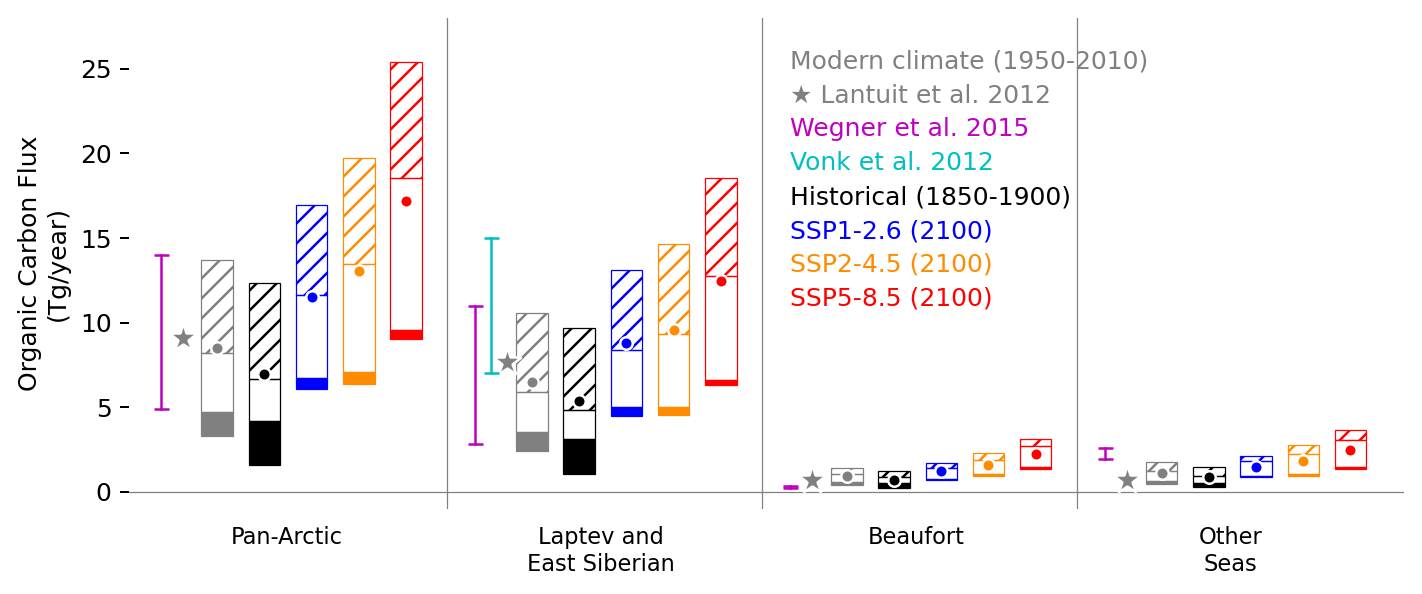

In [5]:
def newline(ax, p1, p2, c='k', lw=2, ls='-', alpha=1, drawLimits=False, ms=6):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], c=c, lw=lw, ls=ls, alpha=alpha)
    ax.add_line(l)
    if drawLimits:
        ax.plot(p1[0], p1[1], '_', ms=ms, markeredgecolor=c)
        ax.plot(p2[0], p2[1], '_', ms=ms, markeredgecolor=c)
    return l

def nospines(ax):
    import matplotlib.pyplot as plt
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    plt.tick_params(
    axis='y',       
    which='both',     
    left=True,      
    labelleft=True)
    plt.tick_params(
    axis='x',       
    which='both',     
    bottom=False, 
    labelbottom=True)
    
lw=0.5
width=0.10

fig = plt.figure(figsize=(8.0,3.4), dpi=180)
ax = fig.add_subplot(111)
    

for i in [0,1,2,3]:
    
    if i==1:
        plt.plot(i-0.30, eros_ocf_acd_agg[i], '*', markerfacecolor='grey', markeredgecolor='w', ms=12)
        newline(ax, [i-0.35, 11.0-4.0],[i-0.35, 11.0+4.0], c='c', lw=1, ls='-', alpha=1, drawLimits=True)
    else:
        plt.plot(i-0.33, eros_ocf_acd_agg[i], '*', markerfacecolor='grey', markeredgecolor='w', ms=12)        
    newline(ax, [i-0.40, ocflux_wegner_plot[i,0]], [i-0.4, ocflux_wegner_plot[i,1]], c='m', lw=1, ls='-', drawLimits=True)

    val =   np.nanmean(eros_ocf_ssp245_agg[141,i,0], axis=0)
    tot = 4*np.nanmean(eros_ocf_ssp245_agg[141,i,1], axis=0)
    ens = 4*np.nanmean(eros_ocf_ssp245_agg[141,i,2], axis=0)
    tem = 4*np.nanmean(eros_ocf_ssp245_agg[141,i,3], axis=0)
    spa = 4*np.nanmean(eros_ocf_ssp245_agg[141,i,4], axis=0)
    plt.plot(i-0.22, val, 'o', c='grey', lw=0.5, markeredgecolor='w', ms=5)
    plt.bar(i-0.22, ens, width, bottom=val-tot/2, color='grey', edgecolor='grey', lw=lw)
    plt.bar(i-0.22, tem, width, bottom=val-tot/2+ens, color='none', edgecolor='grey', hatch='', lw=lw)
    plt.bar(i-0.22, spa, width, bottom=val-tot/2+ens+tem, color='none', edgecolor='grey', hatch='///', lw=lw)

    val = np.nanmean(eros_ocf_ssp245_agg[:100,i,0], axis=0)
    tot = 4*np.nanmean(eros_ocf_ssp245_agg[:100,i,1], axis=0)
    ens = 4*np.nanmean(eros_ocf_ssp245_agg[:100,i,2], axis=0)
    tem = 4*np.nanmean(eros_ocf_ssp245_agg[:100,i,3], axis=0)
    spa = 4*np.nanmean(eros_ocf_ssp245_agg[:100,i,4], axis=0)
    plt.plot(i-0.07, val, 'o', c='k', lw=0.5, markeredgecolor='w', ms=5)
    plt.bar(i-0.07, ens, width, bottom=val-tot/2, color='k', edgecolor='k', lw=lw)
    plt.bar(i-0.07, tem, width, bottom=val-tot/2+ens, color='none', edgecolor='k', hatch='', lw=lw)
    plt.bar(i-0.07, spa, width, bottom=val-tot/2+ens+tem, color='none', edgecolor='k', hatch='///', lw=lw)

    val = np.mean(eros_ocf_ssp126_agg[-30:-1,i,0])
    tot = 4*eros_ocf_ssp126_agg[-1,i,1]
    ens = 4*eros_ocf_ssp126_agg[-1,i,2]
    tem = 4*eros_ocf_ssp126_agg[-1,i,3]
    spa = 4*eros_ocf_ssp126_agg[-1,i,4]
    plt.plot(i+0.08, val, 'o', c='b', lw=0.5, markeredgecolor='w', ms=5)
    plt.bar(i+0.08, ens, width, bottom=val-tot/2, color='b', edgecolor='b', lw=lw)
    plt.bar(i+0.08, tem, width, bottom=val-tot/2+ens, color='none', edgecolor='b', hatch='', lw=lw)
    plt.bar(i+0.08, spa, width, bottom=val-tot/2+ens+tem, color='none', edgecolor='b', hatch='///', lw=lw)

    val = eros_ocf_ssp245_agg[-1,i,0]
    tot = 4*eros_ocf_ssp245_agg[-1,i,1]
    ens = 4*eros_ocf_ssp245_agg[-1,i,2]
    tem = 4*eros_ocf_ssp245_agg[-1,i,3]
    spa = 4*eros_ocf_ssp245_agg[-1,i,4]
    plt.plot(i+0.23, val, 'o', c='darkorange', lw=0.5, markeredgecolor='w', ms=5)
    plt.bar(i+0.23, ens, width, bottom=val-tot/2, color='darkorange', edgecolor='darkorange', lw=lw)
    plt.bar(i+0.23, tem, width, bottom=val-tot/2+ens, color='none', edgecolor='darkorange', hatch='', lw=lw)
    plt.bar(i+0.23, spa, width, bottom=val-tot/2+ens+tem, color='none', edgecolor='darkorange', hatch='///', lw=lw)

    val = eros_ocf_ssp585_agg[-1,i,0]
    tot = 4*eros_ocf_ssp585_agg[-1,i,1]
    ens = 4*eros_ocf_ssp585_agg[-1,i,2]
    tem = 4*eros_ocf_ssp585_agg[-1,i,3]
    spa = 4*eros_ocf_ssp585_agg[-1,i,4]
    plt.plot(i+0.38, val, 'o', c='r', lw=0.5, markeredgecolor='w', ms=5)
    plt.bar(i+0.38, ens, width, bottom=val-tot/2, color='r', edgecolor='r', lw=lw)
    plt.bar(i+0.38, tem, width, bottom=val-tot/2+ens, color='none', edgecolor='r', hatch='', lw=lw)
    plt.bar(i+0.38, spa, width, bottom=val-tot/2+ens+tem, color='none', edgecolor='r', hatch='///', lw=lw)

    if i<3:
            plt.axvline(i+0.51, c='grey', lw=lw)
            
plt.ylim((0,22))
plt.xlim((-0.5,4.45))
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['Pan-Arctic', 'Laptev and\nEast Siberian', 'Beaufort', 'Other\nSeas'], 
                   rotation=0, fontsize=9)

plt.text(1.6,25,'Modern climate (1950-2010)', fontweight='normal', c='grey')
plt.text(1.6,23,'\u2605 Lantuit et al. 2012', c='grey', fontweight='normal')
plt.text(1.6,21,'Wegner et al. 2015', c='m', fontweight='normal')
plt.text(1.6,19,'Vonk et al. 2012', c='c', fontweight='normal')
plt.text(1.6,17,'Historical (1850-1900)', c='k', fontweight='normal')
plt.text(1.6,15,'SSP1-2.6 (2100)', c='b', fontweight='normal')
plt.text(1.6,13,'SSP2-4.5 (2100)', c='darkorange', fontweight='normal')
plt.text(1.6,11,'SSP5-8.5 (2100)', c='r', fontweight='normal')
plt.ylabel('Organic Carbon Flux\n(Tg/year)')
plt.xlim((-0.5,3.55))
plt.ylim((-1,28))
plt.tight_layout()
nospines(ax)
plt.axhline(0, color='grey', lw=lw, ls='-',zorder=0)
plt.show()